In [62]:
import pandas as pd
import numpy as np

In [63]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [64]:
# use pandas
df = pd.read_csv('dataset.csv', sep = ",")

In [65]:
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [66]:
df.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [116]:
# Parse dates and set date column to index
dd = pd.read_csv("dataset.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
dd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [117]:
data = pd.DataFrame(dd["Close"])
data

,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107
...,...
2020-11-16,3626.909912
2020-11-17,3609.530029
2020-11-18,3567.790039


In [68]:
#df.info()
print("Number of rows: " + str(len(df)))

Number of rows: 1825


In [69]:
print(df['High'].describe());
print();
print(df['Low'].describe());
print();
print(df['Open'].describe());
print();
print(df['Close'].describe())

count    1825.000000
mean     2660.718673
std       409.680853
min      1847.000000
25%      2348.350098
50%      2696.250000
75%      2930.790039
max      3645.989990
Name: High, dtype: float64

count    1825.000000
mean     2632.817580
std       404.310068
min      1810.099976
25%      2322.250000
50%      2667.840088
75%      2900.709961
max      3600.159912
Name: Low, dtype: float64

count    1825.000000
mean     2647.704751
std       407.169994
min      1833.400024
25%      2341.979980
50%      2685.489990
75%      2913.860107
max      3612.090088
Name: Open, dtype: float64

count    1825.000000
mean     2647.856284
std       407.301177
min      1829.079956
25%      2328.949951
50%      2683.340088
75%      2917.520020
max      3626.909912
Name: Close, dtype: float64


In [70]:
df['Date']

0       2015-11-23
1       2015-11-24
2       2015-11-25
3       2015-11-26
4       2015-11-27
           ...    
1820    2020-11-16
1821    2020-11-17
1822    2020-11-18
1823    2020-11-19
1824    2020-11-20
Name: Date, Length: 1825, dtype: object

In [71]:
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
#df['month'] = df['Date'].dt.month
#df['day'] = df['Date'].dt.day 

print(df['year'])
print(len(df['year']))

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1820    2020
1821    2020
1822    2020
1823    2020
1824    2020
Name: year, Length: 1825, dtype: int64
1825


In [72]:
df1 = df.groupby(df['year']).sum().round()
df1

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2015,80809.0,79874.0,80411.0,80296.0,1.401373e+11,80296.0
2016,769513.0,762304.0,766204.0,766255.0,1.434854e+12,766255.0
2017,895576.0,891094.0,893355.0,893699.0,1.240740e+12,893699.0
2018,1007629.0,995767.0,1002235.0,1001520.0,1.323840e+12,1001520.0
2019,1067243.0,1058424.0,1062745.0,1063572.0,1.297208e+12,1063572.0
2020,1035042.0,1017430.0,1027111.0,1026995.0,1.625289e+12,1026995.0


In [73]:
df2 = df1.groupby('year').aggregate({'High': 'sum', 'Low': 'sum', 'Open': 'sum', 'Close': 'sum'}) #df1.groupby('year').agg(close_sum=pd.NamedAgg(column="Close", aggfunc="sum"))
df2

,High,Low,Open,Close
year,,,,
2015,80809.0,79874.0,80411.0,80296.0
2016,769513.0,762304.0,766204.0,766255.0
2017,895576.0,891094.0,893355.0,893699.0
2018,1007629.0,995767.0,1002235.0,1001520.0
2019,1067243.0,1058424.0,1062745.0,1063572.0
2020,1035042.0,1017430.0,1027111.0,1026995.0


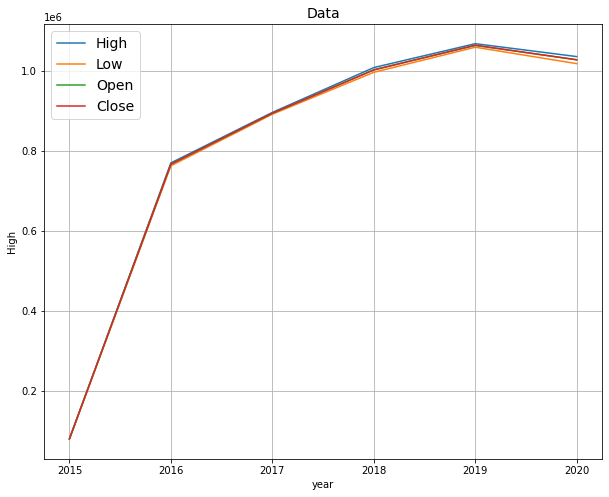

In [74]:
import matplotlib.pyplot as plt

df2.plot(figsize=(10, 8))
plt.ylabel('High')
plt.title("Data", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()
# Вывод графиков


**LSTM**

In [128]:
# Get bitcoin date array
timesteps = data.index.to_numpy()
prices = data["Close"].to_numpy()

timesteps[:15], prices[:15]

(array(['2015-11-23T00:00:00.000000000', '2015-11-24T00:00:00.000000000',
        '2015-11-25T00:00:00.000000000', '2015-11-26T00:00:00.000000000',
        '2015-11-27T00:00:00.000000000', '2015-11-28T00:00:00.000000000',
        '2015-11-29T00:00:00.000000000', '2015-11-30T00:00:00.000000000',
        '2015-12-01T00:00:00.000000000', '2015-12-02T00:00:00.000000000',
        '2015-12-03T00:00:00.000000000', '2015-12-04T00:00:00.000000000',
        '2015-12-05T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
        '2015-12-07T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([2086.59008789, 2089.13989258, 2088.87011719, 2088.87011719,
        2090.11010742, 2090.11010742, 2090.11010742, 2080.40991211,
        2102.62988281, 2079.51000977, 2049.62011719, 2091.68994141,
        2091.68994141, 2091.68994141, 2077.07006836]))

In [129]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1460,), (365,), (1460,), (365,))

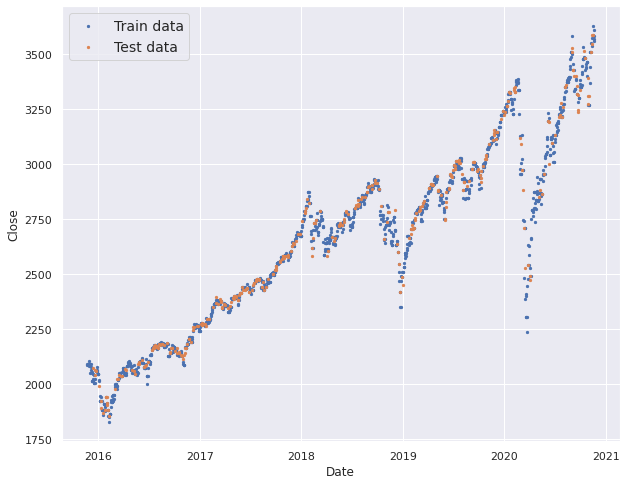

In [130]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend(fontsize=14)
plt.show()

In [131]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1460, 365, 1460, 365)

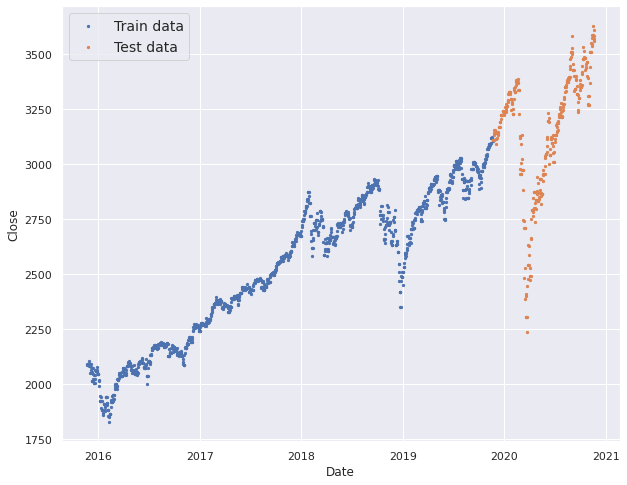

In [132]:
# Plot correctly made splits
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend(fontsize=14)
plt.show()

In [133]:
print(X_train)

['2015-11-23T00:00:00.000000000' '2015-11-24T00:00:00.000000000'
 '2015-11-25T00:00:00.000000000' ... '2019-11-19T00:00:00.000000000'
 '2019-11-20T00:00:00.000000000' '2019-11-21T00:00:00.000000000']


In [134]:
print(y_train)

[2086.59008789 2089.13989258 2088.87011719 ... 3120.17993164 3108.45996094
 3103.54003906]


In [136]:
# Load the dataset
dataset = data.values
print(dataset)
print(dataset.shape)

[[2086.59008789]
 [2089.13989258]
 [2088.87011719]
 ...
 [3567.79003906]
 [3581.87011719]
 [3557.54003906]]
(1825, 1)


In [137]:
# Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
print(dataset.shape)

[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.96711598]
 [0.97494769]
 [0.96141466]]
(1825, 1)


In [138]:
# Split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [139]:
print(train)
print(train.shape)

[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.71814354]
 [0.71162459]
 [0.708888  ]]
(1460, 1)


In [140]:
print(test)
print(test.shape)

[[0.71264253]
 [0.71264253]
 [0.71264253]
 [0.72563033]
 [0.72945723]
 [0.73674928]
 [0.73674928]
 [0.72971307]
 [0.72971307]
 [0.72971307]
 [0.71463386]
 [0.70313657]
 [0.71401639]
 [0.71661392]
 [0.73245523]
 [0.73245523]
 [0.73245523]
 [0.72692081]
 [0.72500742]
 [0.73007457]
 [0.7450594 ]
 [0.74518732]
 [0.74518732]
 [0.74518732]
 [0.75778579]
 [0.75838099]
 [0.75761333]
 [0.76552855]
 [0.77434465]
 [0.77434465]
 [0.77434465]
 [0.77589655]
 [0.77554605]
 [0.77554605]
 [0.78474049]
 [0.78480173]
 [0.78480173]
 [0.78480173]
 [0.77438363]
 [0.77966221]
 [0.77966221]
 [0.79471929]
 [0.78192609]
 [0.78192609]
 [0.78192609]
 [0.78828371]
 [0.783222  ]
 [0.79204937]
 [0.80409162]
 [0.79889098]
 [0.79889098]
 [0.79889098]
 [0.8115617 ]
 [0.8087917 ]
 [0.812207  ]
 [0.82751436]
 [0.83463965]
 [0.83463965]
 [0.83463965]
 [0.83463965]
 [0.82972813]
 [0.83026208]
 [0.8323702 ]
 [0.81564444]
 [0.81564444]
 [0.81564444]
 [0.78680963]
 [0.80494823]
 [0.8033685 ]
 [0.80907538]
 [0.77673645]
 [0.77

In [141]:
import numpy as np

# Function for dataset creating
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [142]:
# Reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [143]:
print(trainX)
print(trainX.shape)

[[0.14323386 0.14465213 0.14450208 ... 0.14519179 0.14519179 0.14519179]
 [0.14465213 0.14450208 0.14450208 ... 0.14519179 0.14519179 0.13979629]
 [0.14450208 0.14450208 0.14519179 ... 0.14519179 0.13979629 0.15215562]
 ...
 [0.69969357 0.70238018 0.70360385 ... 0.7182993  0.7182993  0.7182993 ]
 [0.70238018 0.70360385 0.70504439 ... 0.7182993  0.7182993  0.71917262]
 [0.70360385 0.70504439 0.7182993  ... 0.7182993  0.71917262 0.71814354]]
(1452, 7)


In [144]:
print(trainY)
print(trainY.shape)

[0.13979629 0.15215562 0.13929574 ... 0.71917262 0.71814354 0.71162459]
(1452,)


In [145]:
print(testX)
print(testX.shape)

[[0.71264253 0.71264253 0.71264253 ... 0.72945723 0.73674928 0.73674928]
 [0.71264253 0.71264253 0.72563033 ... 0.73674928 0.73674928 0.72971307]
 [0.71264253 0.72563033 0.72945723 ... 0.73674928 0.72971307 0.72971307]
 ...
 [0.95473438 0.96982473 0.94999533 ... 0.97677199 0.97677199 1.        ]
 [0.96982473 0.94999533 0.97677199 ... 0.97677199 1.         0.99033286]
 [0.94999533 0.97677199 0.97677199 ... 1.         0.99033286 0.96711598]]
(357, 7)


In [146]:
print(testY)
print(testY.shape)

[0.72971307 0.72971307 0.72971307 0.71463386 0.70313657 0.71401639
 0.71661392 0.73245523 0.73245523 0.73245523 0.72692081 0.72500742
 0.73007457 0.7450594  0.74518732 0.74518732 0.74518732 0.75778579
 0.75838099 0.75761333 0.76552855 0.77434465 0.77434465 0.77434465
 0.77589655 0.77554605 0.77554605 0.78474049 0.78480173 0.78480173
 0.78480173 0.77438363 0.77966221 0.77966221 0.79471929 0.78192609
 0.78192609 0.78192609 0.78828371 0.783222   0.79204937 0.80409162
 0.79889098 0.79889098 0.79889098 0.8115617  0.8087917  0.812207
 0.82751436 0.83463965 0.83463965 0.83463965 0.83463965 0.82972813
 0.83026208 0.8323702  0.81564444 0.81564444 0.81564444 0.78680963
 0.80494823 0.8033685  0.80907538 0.77673645 0.77673645 0.77673645
 0.78975209 0.81682371 0.83745962 0.84362821 0.83357717 0.83357717
 0.83357717 0.84713803 0.85028622 0.8623563  0.85929149 0.8627512
 0.8627512  0.8627512  0.8627512  0.85726132 0.86608299 0.85889659
 0.8391617  0.8391617  0.8391617  0.77694219 0.72261006 0.7160354

In [147]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [148]:
print(trainX)

[[[0.14323386 0.14465213 0.14450208 ... 0.14519179 0.14519179 0.14519179]]

 [[0.14465213 0.14450208 0.14450208 ... 0.14519179 0.14519179 0.13979629]]

 [[0.14450208 0.14450208 0.14519179 ... 0.14519179 0.13979629 0.15215562]]

 ...

 [[0.69969357 0.70238018 0.70360385 ... 0.7182993  0.7182993  0.7182993 ]]

 [[0.70238018 0.70360385 0.70504439 ... 0.7182993  0.7182993  0.71917262]]

 [[0.70360385 0.70504439 0.7182993  ... 0.7182993  0.71917262 0.71814354]]]


In [149]:
print(testX)

[[[0.71264253 0.71264253 0.71264253 ... 0.72945723 0.73674928 0.73674928]]

 [[0.71264253 0.71264253 0.72563033 ... 0.73674928 0.73674928 0.72971307]]

 [[0.71264253 0.72563033 0.72945723 ... 0.73674928 0.72971307 0.72971307]]

 ...

 [[0.95473438 0.96982473 0.94999533 ... 0.97677199 0.97677199 1.        ]]

 [[0.96982473 0.94999533 0.97677199 ... 0.97677199 1.         0.99033286]]

 [[0.94999533 0.97677199 0.97677199 ... 1.         0.99033286 0.96711598]]]


In [150]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [151]:
print(trainY)

[[0.13979629]
 [0.15215562]
 [0.13929574]
 ...
 [0.71917262]
 [0.71814354]
 [0.71162459]]


In [152]:
print(testY)

[[0.72971307]
 [0.72971307]
 [0.72971307]
 [0.71463386]
 [0.70313657]
 [0.71401639]
 [0.71661392]
 [0.73245523]
 [0.73245523]
 [0.73245523]
 [0.72692081]
 [0.72500742]
 [0.73007457]
 [0.7450594 ]
 [0.74518732]
 [0.74518732]
 [0.74518732]
 [0.75778579]
 [0.75838099]
 [0.75761333]
 [0.76552855]
 [0.77434465]
 [0.77434465]
 [0.77434465]
 [0.77589655]
 [0.77554605]
 [0.77554605]
 [0.78474049]
 [0.78480173]
 [0.78480173]
 [0.78480173]
 [0.77438363]
 [0.77966221]
 [0.77966221]
 [0.79471929]
 [0.78192609]
 [0.78192609]
 [0.78192609]
 [0.78828371]
 [0.783222  ]
 [0.79204937]
 [0.80409162]
 [0.79889098]
 [0.79889098]
 [0.79889098]
 [0.8115617 ]
 [0.8087917 ]
 [0.812207  ]
 [0.82751436]
 [0.83463965]
 [0.83463965]
 [0.83463965]
 [0.83463965]
 [0.82972813]
 [0.83026208]
 [0.8323702 ]
 [0.81564444]
 [0.81564444]
 [0.81564444]
 [0.78680963]
 [0.80494823]
 [0.8033685 ]
 [0.80907538]
 [0.77673645]
 [0.77673645]
 [0.77673645]
 [0.78975209]
 [0.81682371]
 [0.83745962]
 [0.84362821]
 [0.83357717]
 [0.83

In [153]:
import keras
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [154]:
model = Sequential()

model.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 512)            1064960   
                                                                 
 lstm_5 (LSTM)               (None, 256)               787456    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,852,673
Trainable params: 1,852,673
Non-trainable params: 0
_________________________________________________________________
None


In [155]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 6s - loss: 0.0022 - 6s/epoch - 94ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0022 - 1s/epoch - 20ms/step
Epoch 3/10
59/59 - 1s - loss: 7.1667e-04 - 1s/epoch - 21ms/step
Epoch 4/10
59/59 - 1s - loss: 3.4476e-04 - 1s/epoch - 21ms/step
Epoch 5/10
59/59 - 1s - loss: 3.3871e-04 - 1s/epoch - 20ms/step
Epoch 6/10
59/59 - 1s - loss: 3.4305e-04 - 1s/epoch - 21ms/step
Epoch 7/10
59/59 - 1s - loss: 3.9178e-04 - 1s/epoch - 21ms/step
Epoch 8/10
59/59 - 1s - loss: 3.4587e-04 - 1s/epoch - 21ms/step
Epoch 9/10
59/59 - 1s - loss: 3.7652e-04 - 1s/epoch - 21ms/step
Epoch 10/10
59/59 - 1s - loss: 3.4963e-04 - 1s/epoch - 20ms/step


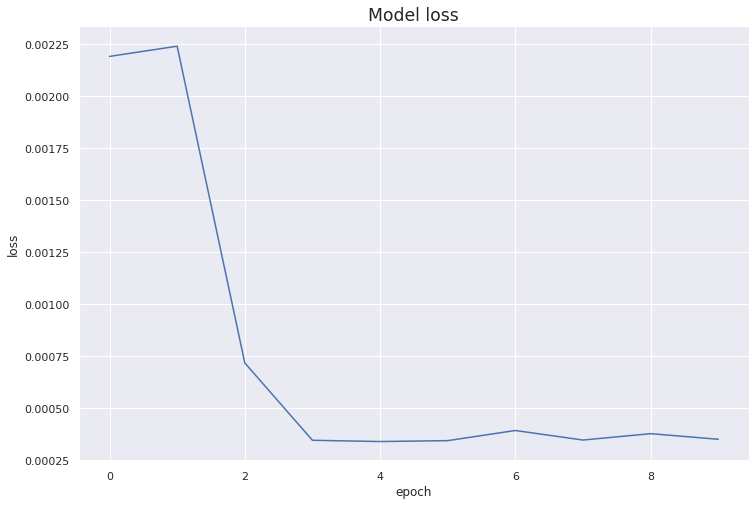

In [156]:
# summarize history for loss
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8), 'axes.titlesize':'x-large'})
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [157]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict[:10])
print(testPredict[:10])

[[0.16687019]
 [0.16584131]
 [0.16764124]
 [0.16642892]
 [0.16119187]
 [0.16191971]
 [0.16323279]
 [0.163952  ]
 [0.16335544]
 [0.15976216]]
[[0.75150526]
 [0.752911  ]
 [0.7538765 ]
 [0.7549391 ]
 [0.75204456]
 [0.74700713]
 [0.74438274]
 [0.7428447 ]
 [0.7451179 ]
 [0.7472992 ]]


In [158]:
data

,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107
...,...
2020-11-16,3626.909912
2020-11-17,3609.530029
2020-11-18,3567.790039


In [159]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[2129.0842]
 [2127.2344]
 [2130.4705]
 ...
 [3155.58  ]
 [3159.516 ]
 [3162.193 ]]


In [160]:
trainY = scaler.inverse_transform(trainY)
print(trainY)

[[2080.40991211]
 [2102.62988281]
 [2079.51000977]
 ...
 [3122.0300293 ]
 [3120.17993164]
 [3108.45996094]]


In [161]:
testPredict = scaler.inverse_transform(testPredict)
print(testPredict)

[[3180.1584]
 [3182.6858]
 [3184.4219]
 [3186.332 ]
 [3181.1282]
 [3172.0718]
 [3167.3535]
 [3164.5884]
 [3168.675 ]
 [3172.5967]
 [3175.3813]
 [3177.045 ]
 [3179.3743]
 [3181.6638]
 [3189.192 ]
 [3193.9385]
 [3197.7817]
 [3200.7812]
 [3208.2644]
 [3215.2607]
 [3220.5662]
 [3225.8542]
 [3233.554 ]
 [3239.977 ]
 [3245.5837]
 [3249.2986]
 [3252.1482]
 [3254.7295]
 [3259.3765]
 [3262.479 ]
 [3264.9521]
 [3267.0237]
 [3265.0034]
 [3264.7812]
 [3265.131 ]
 [3269.4976]
 [3269.0984]
 [3268.4038]
 [3267.5017]
 [3270.418 ]
 [3270.4502]
 [3273.9211]
 [3279.028 ]
 [3283.2766]
 [3286.4246]
 [3289.3235]
 [3295.1045]
 [3300.0173]
 [3304.4692]
 [3311.8757]
 [3321.4648]
 [3329.2969]
 [3336.0935]
 [3340.1653]
 [3342.1538]
 [3343.8486]
 [3344.496 ]
 [3338.6638]
 [3333.3245]
 [3329.0886]
 [3315.7249]
 [3310.4658]
 [3306.516 ]
 [3304.301 ]
 [3293.4148]
 [3283.7861]
 [3274.9292]
 [3276.1199]
 [3284.3914]
 [3299.6501]
 [3312.988 ]
 [3324.2732]
 [3333.1262]
 [3340.6687]
 [3350.6326]
 [3357.7598]
 [3365.6292]

In [162]:
testY = scaler.inverse_transform(testY)
print(testY)

[[3140.97998047]
 [3140.97998047]
 [3140.97998047]
 [3113.87011719]
 [3093.19995117]
 [3112.76000977]
 [3117.42993164]
 [3145.90991211]
 [3145.90991211]
 [3145.90991211]
 [3135.95996094]
 [3132.52001953]
 [3141.62988281]
 [3168.57006836]
 [3168.80004883]
 [3168.80004883]
 [3168.80004883]
 [3191.44995117]
 [3192.52001953]
 [3191.13989258]
 [3205.37011719]
 [3221.2199707 ]
 [3221.2199707 ]
 [3221.2199707 ]
 [3224.01000977]
 [3223.37988281]
 [3223.37988281]
 [3239.90991211]
 [3240.02001953]
 [3240.02001953]
 [3240.02001953]
 [3221.29003906]
 [3230.7800293 ]
 [3230.7800293 ]
 [3257.85009766]
 [3234.85009766]
 [3234.85009766]
 [3234.85009766]
 [3246.2800293 ]
 [3237.17993164]
 [3253.05004883]
 [3274.69995117]
 [3265.35009766]
 [3265.35009766]
 [3265.35009766]
 [3288.12988281]
 [3283.14990234]
 [3289.29003906]
 [3316.81005859]
 [3329.62011719]
 [3329.62011719]
 [3329.62011719]
 [3329.62011719]
 [3320.79003906]
 [3321.75      ]
 [3325.54003906]
 [3295.4699707 ]
 [3295.4699707 ]
 [3295.4699707

In [163]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 63.08 RMSE
Test Score: 79.25 RMSE


In [164]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 8), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

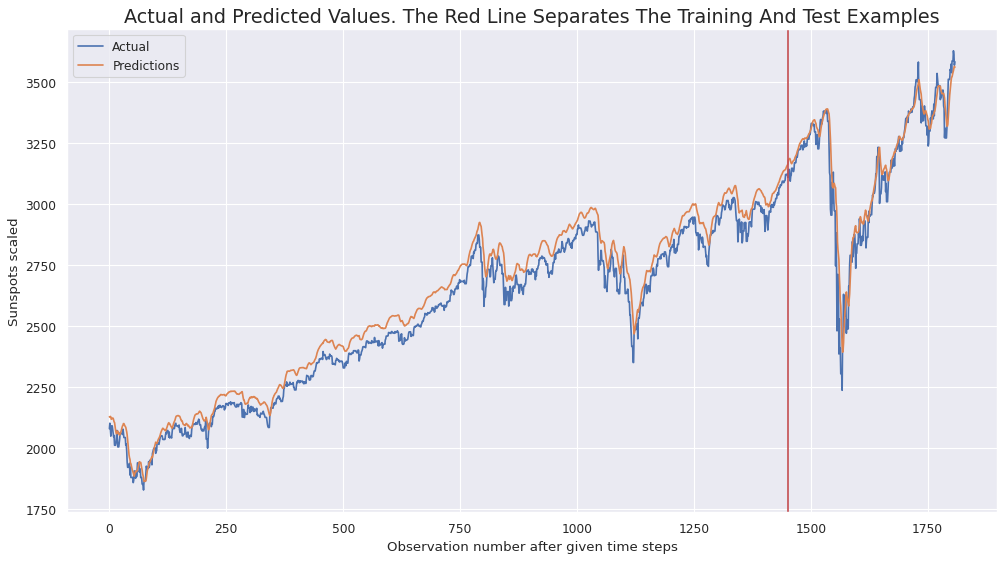

In [165]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)